# Intital Data Analysis of Pew Research Center's Teen Dating Survery

* This notebooks shows the process of cleaning a portion of the data from Pew Research Center's 2014-2015 Teen Dating Survey. It also includes exploratory data analysis. 

* Link to data: https://www.pewresearch.org/internet/dataset/september-2014-march-2015-teens/
    From 9/25/14 to 10/9/14 and from 2/10/15 to 3/6/15 Pew Research Center collected data from more than 1600 parents and children asking them a wide variety of questions revolving around technology, social media, dating, and friendships.  The dataset also contains demographic information about the respondents. 

In [19]:
import pandas as pd
from IPython.display import HTML, Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
dating_df = pd.read_csv('../data/Teen_Dating_Survey.csv')

# Dataframe Examination 

In [21]:
dating_df.shape

(1642, 318)

In [22]:
dating_df.sample(15)

,CaseID,par_weight,teen_weight,xspanish,xprimelan,QS1,QS2,P1_A,P1_B,P1_C,...,ppreg9,PPRENT,PPSTATEN,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PPWORK,PPNET
50,67,0.572,0.3129,1,5,1,1,2,1,1,...,2.0,1.0,21.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
411,527,0.5245,0.3866,1,5,1,1,2,1,1,...,2.0,1.0,23.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0
433,560,0.6171,0.601,1,5,1,1,1,1,1,...,5.0,2.0,59.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0
1261,1615,0.9711,0.8344,1,5,1,1,1,1,1,...,5.0,1.0,58.0,0.0,0.0,0.0,1.0,2.0,7.0,1.0
337,429,0.8455,0.7126,1,5,1,1,1,2,2,...,5.0,2.0,59.0,0.0,1.0,1.0,0.0,3.0,6.0,1.0
690,872,0.7828,1.116,1,5,1,1,1,2,1,...,2.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1482,1946,3.8505,3.0392,1,5,1,1,1,2,1,...,5.0,1.0,54.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0
1216,1556,0.8493,1.0847,2,3,2,2,1,2,1,...,7.0,2.0,74.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
742,933,,,1,5,0,,,,,...,2.0,1.0,21.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0
785,983,1.2805,1.3943,1,5,1,1,1,-1,1,...,5.0,1.0,59.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0


### There are 1642 rows and 318 columns in this dataframe.

### Each row represents an individual, either a parent or teenager, and their responses to the survey questions.  

### The first column is an identification number but I'm not sure what columns 2 - 7 represent. I have access to the survey questions but could not connect these columns to any information in that document. The rest of the columns represent questions asked in the survey. 

# Data Cleaning
##### Since this data file is very large Mason, Sofi, and I will be splitting it into 3 sections and cleaning these sections individually. Also, we will only include questions related to relationships/dating  in our cleaned dataframes. My section covers demographic data and a few question responses.

### I realized while cleaning the data that I can't actually use some of the demographic data columns. All of the responses to the survey are coded as numbers and it is unclear which reponse the numbers represent. The survey question document does provide summary statistics for each of the questions but for some of the questions the numbers on the document do not align with the numbers on the file. 

In [23]:
# ppreg9 column represents a question that asked parents what region they lived in with 9 possible regions. None of the data 
# in the survey question document correspond with the value counts below. This didn't occur with all of the columns.
dating_df['ppreg9'].value_counts()

9.0    303
5.0    265
3.0    255
7.0    207
2.0    183
8.0    135
4.0    122
1.0     84
6.0     81
Name: ppreg9, dtype: int64

In [24]:
# My cleaned data frame includes the questions related to dating/relationships in my section and some demographic data.
cdating_df = dating_df[['CaseID','DT2_A','DT2_B','DT2_C',
                        'DT2_D','DT2_E','DT2_F','DT2_G','DT2_H',
                        'DT2_I','DT4','DT4A','KRS','KSO','KTG',
                        'Child_age','Child_gender','PPAGE','PPGENDER',
                        'PPRENT','PPHHHEAD','PPHHSIZE','PPMSACAT','PPNET']]

newcolname_map = {
    'DT4A': 'DT4_A',
    'CaseID': 'ID',
    'KSO': 'Sexuality',
    'KTG': 'Transgender',
    'Child_age': 'Child_Age',
    'Child_gender': 'Child_Gen',
    'PPAGE': 'Parent_Age',
    'PPGENDER': 'Parent_Gen',
    'PPHHHEAD': 'Parent_HOH',
    'PPMSACAT': 'Parent_Metro',
    'PPRENT': 'Parent_Rent',
    'PPHHSIZE': 'Household_Size',
    'PPNET': 'Parent_Internet' 
}

cdating_df = cdating_df.rename(columns=newcolname_map)

In [25]:
# I don't know why but some of the responses to the question "Do you consider yourself to be____", 
# which is in regards to an individual's sexuality, are recorded as -1. I'm going to ignore these responses in my later 
# analyses. The number of people who are coded as -1 are very low compared to all of the responses we have. 
# This occurs with other columns too. 
cdating_df["Sexuality"].value_counts()

2     970
      578
5      30
3      27
-1     14
4      12
1       4
Name: Sexuality, dtype: int64

In [26]:
# I'm creating additional columns that with rows that contain the actual responses that the numbers align with. 

sexuality_mapping = {
    '1': 'Gay or Lesbian',
    '2': 'Straight',
    '3': 'Bisexual',
    '4': 'Something else',
    '5': 'Not sure'
    
}
cdating_df['Sexuality_Long'] = cdating_df['Sexuality'].map(sexuality_mapping)

cgender_mapping = {
    '1': 'Male',
    '2': 'Female'
}
pgender_mapping = {
    1.0: 'Male',
    2.0: 'Female'
}
cdating_df['Child_Gen_Long'] = cdating_df['Child_Gen'].map(cgender_mapping)
cdating_df['Parent_Gen_Long'] = cdating_df['Parent_Gen'].map(pgender_mapping)
trans_map = {
    '1': 'Yes',
    '2': 'Yes',
    '3': 'Yes',
    '4': 'No'
    
}
cdating_df['Transgender_Long'] = cdating_df['Transgender'].map(trans_map)
HOH_map = {
    0.0:'No',
    1.0: 'Yes'
}
cdating_df['Parent_HOH_Long'] = cdating_df['Parent_HOH'].map(HOH_map)
Pmetro_map = {
    1.0: 'Metro',
    0.0: 'Non-metro'
}
cdating_df['Parent_Metro_Long'] = cdating_df['Parent_Metro'].map(Pmetro_map)
Prent_map = {
    1.0: 'Own',
    2.0: 'Rent',
    3.0: 'Neither'
}
cdating_df['Parent_Rent_Long'] = cdating_df['Parent_Rent'].map(Prent_map)
pnet_map = {
    1.0: 'Yes',
    0.0: 'No'
}
cdating_df['Parent_Internet_Long'] = cdating_df['Parent_Internet'].map(pnet_map)

### I don't plan on making any long columns for the question responses yet. I don't want my dataframe to be unneccessarily wide, especially since I do not know yet which questions from this dataset I will use for my final analysis.

### As of now I don't want to remove any rows. There are certain columns that have weird responses (e.g. negative numbers) for some of their rows but not all of the responses for that specific row are consistently weird. However, once I start doing more specific analyses I do not plan on including rows with weird data entries. 

In [27]:
# This clean dataset only includes demographic information.
cdatingdem_df = cdating_df[['ID', 'Sexuality_Long', 'Transgender_Long','Parent_HOH_Long', 'Parent_Metro_Long', 'Parent_Internet_Long','Child_Gen_Long','Parent_Gen_Long', 'Parent_Age','Child_Age','Household_Size']]
cdatingdem_df.sample(10)

,ID,Sexuality_Long,Transgender_Long,Parent_HOH_Long,Parent_Metro_Long,Parent_Internet_Long,Child_Gen_Long,Parent_Gen_Long,Parent_Age,Child_Age,Household_Size
1201,1537,Straight,No,Yes,Metro,Yes,Male,Female,50.0,14,4.0
1466,1922,NaN,NaN,Yes,Metro,Yes,NaN,Female,51.0,,5.0
1063,1349,Straight,No,Yes,Metro,No,Male,Male,62.0,16,3.0
794,992,Straight,No,Yes,Metro,Yes,Female,Female,46.0,13,5.0
1462,1915,NaN,NaN,Yes,Metro,Yes,NaN,Male,41.0,,4.0
988,1259,Straight,No,Yes,Metro,Yes,Male,Male,42.0,15,4.0
1144,1461,NaN,NaN,Yes,Metro,No,NaN,Female,67.0,,5.0
1576,2082,NaN,NaN,Yes,Metro,Yes,Female,Female,43.0,15,2.0
666,845,Straight,No,Yes,Metro,Yes,Male,Male,34.0,17,4.0
476,619,NaN,NaN,No,Metro,Yes,NaN,Male,52.0,,3.0


In [28]:
# Clean dataset
cdating_df.sample(10)

,ID,DT2_A,DT2_B,DT2_C,DT2_D,DT2_E,DT2_F,DT2_G,DT2_H,DT2_I,...,Parent_Metro,Parent_Internet,Sexuality_Long,Child_Gen_Long,Parent_Gen_Long,Transgender_Long,Parent_HOH_Long,Parent_Metro_Long,Parent_Rent_Long,Parent_Internet_Long
1475,1938,,,,,,,,,,...,1.0,1.0,Straight,Male,Female,No,Yes,Metro,Rent,Yes
1104,1408,3,1,1,3,1,3,3,3,3,...,1.0,1.0,Straight,Male,Female,No,Yes,Metro,Own,Yes
695,877,,,,,,,,,,...,1.0,1.0,NaN,NaN,Male,NaN,Yes,Metro,Own,Yes
1025,1302,,,,,,,,,,...,1.0,1.0,Bisexual,Female,Female,No,Yes,Metro,Own,Yes
269,336,,,,,,,,,,...,1.0,1.0,NaN,NaN,Female,NaN,Yes,Metro,Own,Yes
949,1206,,,,,,,,,,...,1.0,1.0,Straight,Female,Male,No,Yes,Metro,Own,Yes
1199,1535,,,,,,,,,,...,1.0,1.0,Straight,Male,Male,No,Yes,Metro,Own,Yes
943,1196,3,3,3,3,3,3,3,3,3,...,0.0,1.0,Straight,Male,Male,No,No,Non-metro,Own,Yes
1259,1613,,,,,,,,,,...,1.0,1.0,NaN,NaN,Male,NaN,Yes,Metro,Rent,Yes
650,826,,,,,,,,,,...,1.0,1.0,Straight,Male,Female,No,Yes,Metro,Own,Yes


# Data Exploration

#### The distribution of children age and gender is pretty even in the dataset. 

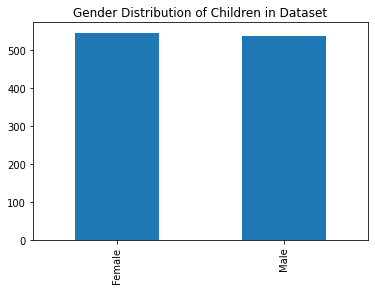

In [29]:
# Since this dataset includes information from parents and their teenagers there is a lot of missing data within certain columns
# For instance, a row representing a parent may not have any information for this column since the parent only recorded their
# own gender.
demcgnan_rf = cdatingdem_df['Child_Gen_Long'].isna()
cdatingdem_df[-demcgnan_rf]['Child_Gen_Long'].value_counts().plot(kind='bar')
plt.title('Gender Distribution of Children in Dataset');

/usr/local/anaconda3/share/jupyter/venv/py3_comm318/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


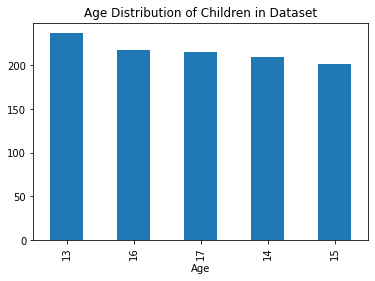

In [30]:
# The data in this column were coded as string objects even though the data represent numbers. In order to remove the rows
# without any data in this column I turned the blank spaces into this column into NaN which allowed me to use .isna()
cdatingdem_df['Child_Age'].replace(' ', np.nan, inplace=True)
demcanan_rf = cdatingdem_df['Child_Age'].isna()
cdatingdem_df[-demcanan_rf]['Child_Age'].value_counts().plot(kind='bar')
plt.title('Age Distribution of Children in Dataset')
plt.xlabel('Age');

In [31]:
# for data like these an ordered/ranked table is probably
# clearer than a bar plot
cdatingdem_df[-demcanan_rf]['Child_Age'].value_counts()

13    237
16    218
17    215
14    210
15    201
Name: Child_Age, dtype: int64

In [32]:
# for a plot you want to keep the x-axis in an 
# expected order (i.e. increasing age)
# so you can sort by index
cdatingdem_df[-demcanan_rf]['Child_Age'].value_counts().sort_index()

13    237
14    210
15    201
16    218
17    215
Name: Child_Age, dtype: int64

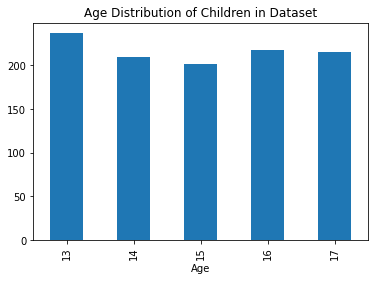

In [33]:
cage_dist = cdatingdem_df[-demcanan_rf]['Child_Age'].value_counts().sort_index()
cage_dist.plot(kind='bar')
plt.title('Age Distribution of Children in Dataset')
plt.xlabel('Age')
plt.show()

#### Question DT4a asks "Do you ever feel like your boyfriend, girlfriend or significant other tries to pressure you into responding to their phone calls, emails, or texts or IMs? Would you say you feel this way..." and the potential responses are "Always" (1), "Somtimes" (2), "Rarely" (3), and "Never" (4). Respondents also had the option to refuse to answer the question. Only children responded to this question. 

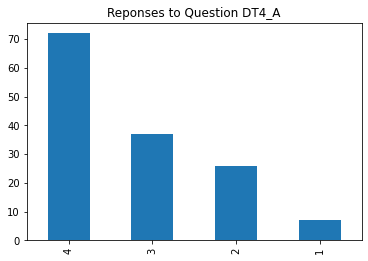

In [34]:
# Weirdly, there was one response in this column that had a negative response. Unsure why but I removed that row from this plot
cdating_df['DT4_A'].value_counts()
cdating_df['DT4_A'].replace(' ', np.nan, inplace=True)
dt4anan_rf = cdating_df['DT4_A'].isna()
neg_rf = cdating_df['DT4_A'] == '-1'
cdating_df[-neg_rf]['DT4_A'].value_counts().plot(kind='bar')
plt.title('Reponses to Question DT4_A');

#### In our actual analysis I would create a mapping dictionary with the actual responses instead of the numbers but since I do not know if this question will be relevant in our final project I do not want to do that yet. Nonetheless, I imagine that I will be doing this type of data analysis a lot in our final project.

#### Futher analysis could look at the above question but among different demographic categories. For example, gender. 

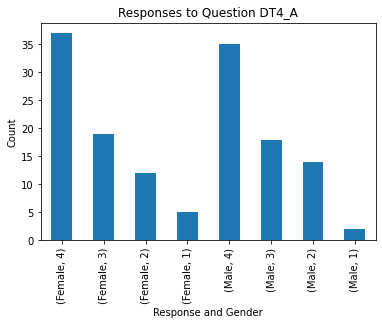

In [36]:
childgen_plot = cdating_df[-neg_rf].groupby('Child_Gen_Long')
childgen_plot['DT4_A'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Response and Gender')
plt.title('Responses to Question DT4_A');

In [42]:
# the distribution looks pretty even by gender
# look at the proportions
childgen_plot['DT4_A'].value_counts(normalize=True).unstack().round(2)

DT4_A,1,2,3,4
Child_Gen_Long,,,,
Female,0.07,0.16,0.26,0.51
Male,0.03,0.20,0.26,0.51


In [48]:
dt4A_by_gender=childgen_plot['DT4_A'].value_counts(normalize=True).unstack(level=0).round(2)
dt4A_by_gender

Child_Gen_Long,Female,Male
DT4_A,,
1,0.07,0.03
2,0.16,0.20
3,0.26,0.26
4,0.51,0.51


<AxesSubplot:xlabel='DT4_A'>

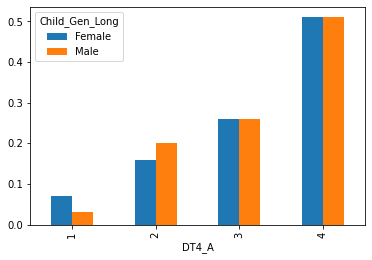

In [49]:
dt4A_by_gender.plot(kind='bar')

In [50]:
# I added my clean data frame with additional columns to the data folder. 

# use index=False to drop the integer index that 
# will get reloaded as an Unamed column
cdating_df.to_csv('../data/Joy_Clean_Teen_Dating.csv', index=False)

# I added a dataset with just the demographic information to the data folder. 
cdatingdem_df.to_csv('../data/Joy_Clean_Teen_Dating_dem.csv', index=False)